<a href="https://colab.research.google.com/github/Agstya/Capstone-Project/blob/master/Loan_Prediction_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [ ]:
train = pd.read_csv('train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
test = pd.read_csv('test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Preprocessing Part 1

In [ ]:
train.drop(columns=['Loan_ID'], inplace=True)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

In [ ]:
train.dropna(inplace=True)

In [ ]:
check_missing = train.isnull().sum() * 100 / train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Exploratory Data Analysis

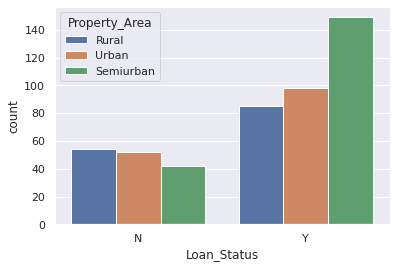

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Property_Area")
#People with Semiurban has high acceptable chance of Loan Status

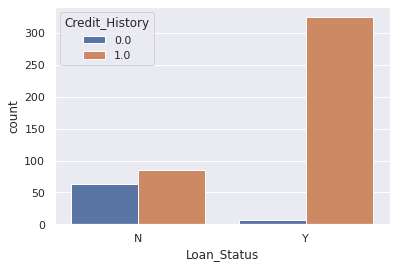

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Credit_History")
#People with acceptable past credit history are most likely accepted in new loan

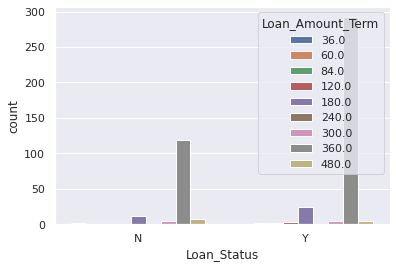

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Loan_Amount_Term")
#People with 360 month loan term are most likely to be acceptable

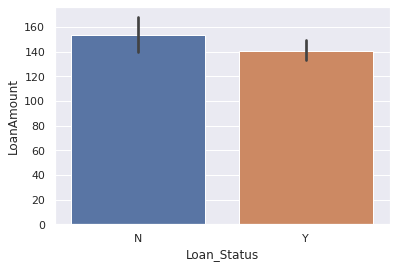

In [ ]:
sns.barplot(data=train, x="Loan_Status", y="LoanAmount")

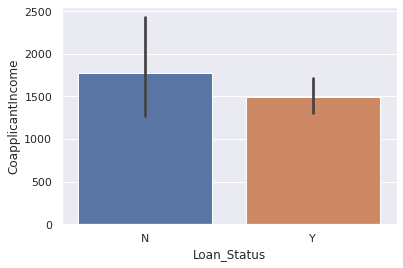

In [ ]:
sns.barplot(data=train, x="Loan_Status", y="CoapplicantIncome")
#People with high CoapplicantIncome are most likely not accepted to the new loan

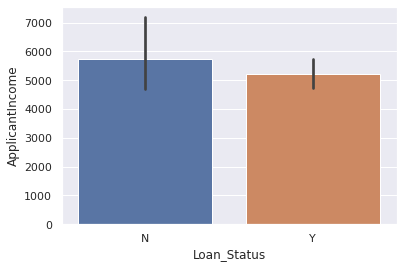

In [ ]:
sns.barplot(data=train, x="Loan_Status", y="ApplicantIncome")

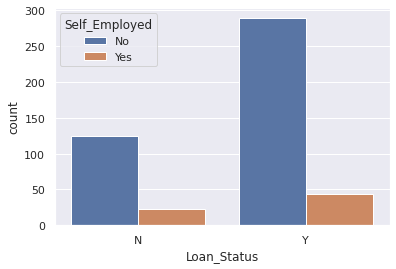

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Self_Employed")

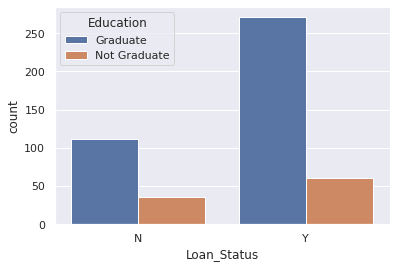

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Education")

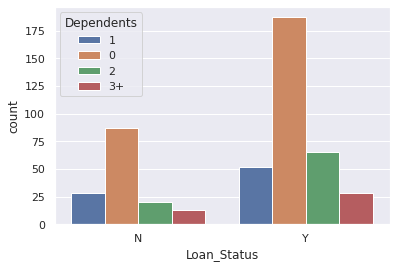

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Dependents")

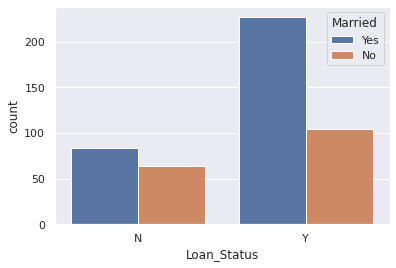

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Married")
#People that Married are more acceptable to request a new loan

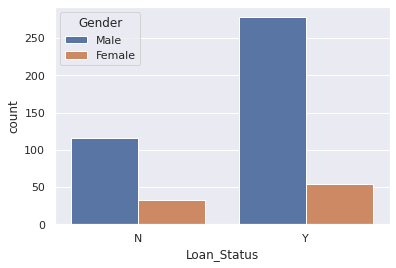

In [ ]:
sns.countplot(data=train, x="Loan_Status", hue="Gender")

# Data Preprocessing Part 2

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
train['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
train['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
train['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [ ]:
train['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
train['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()

array([1, 0])

In [ ]:
train['Married']= label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([1, 0])

In [ ]:
train['Dependents']= label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([1, 0, 2, 3])

In [ ]:
train['Education']= label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [ ]:
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [ ]:
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([0, 2, 1])

In [ ]:
train['Loan_Amount_Term']= label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([7, 3, 4, 1, 6, 8, 5, 0, 2])

In [ ]:
train['Loan_Status']= label_encoder.fit_transform(train['Loan_Status'])
train['Loan_Status'].unique()

array([0, 1])

# Check The Outlier

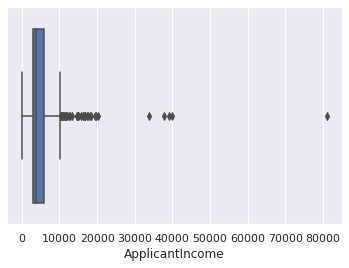

In [ ]:
sns.boxplot(x=train["ApplicantIncome"])

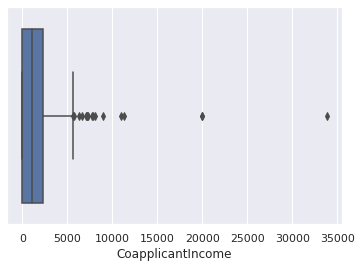

In [ ]:
sns.boxplot(x=train["CoapplicantIncome"])

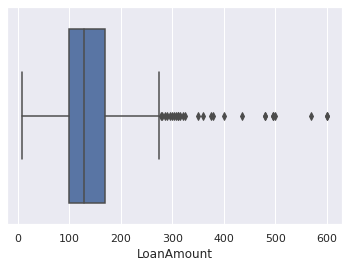

In [ ]:
sns.boxplot(x=train["LoanAmount"])

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(train))
data_clean = train[(z<3).all(axis = 1)] 
data_clean.shape

(452, 12)

# Balanced Class Data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    316
0    136
Name: Loan_Status, dtype: int64

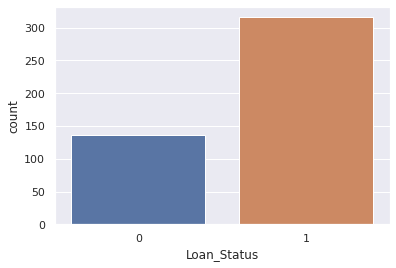

In [ ]:
sns.countplot(data_clean['Loan_Status'])
data_clean['Loan_Status'].value_counts()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data_clean[(data_clean['Loan_Status']==1)] 
df_minority = data_clean[(data_clean['Loan_Status']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 398, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    398
1    316
Name: Loan_Status, dtype: int64

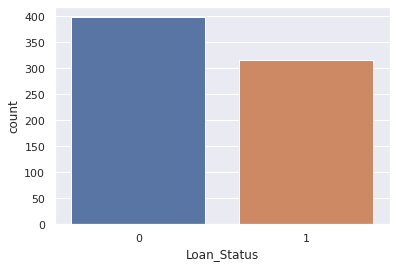

In [ ]:
sns.countplot(df_upsampled['Loan_Status'])
df_upsampled['Loan_Status'].value_counts()

# Data Correlation

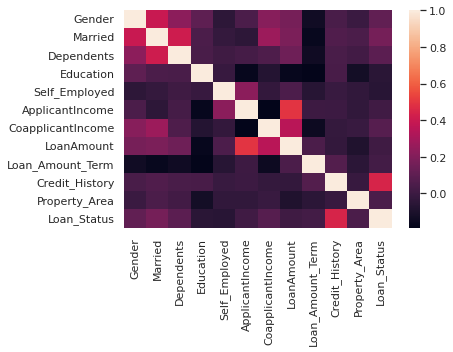

In [ ]:
sns.heatmap(df_upsampled.corr(), fmt='.2g')

# Machine Learning Model Building

In [ ]:
X = df_upsampled.drop('Loan_Status', axis=1)
y = df_upsampled['Loan_Status']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=0)

 # Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.06 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9122807017543859
Precision Score :  1.0
Recall Score :  0.8387096774193549


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.22 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9666666666666666
Precision Score :  1.0
Recall Score :  0.9354838709677419


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 66.67 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.6571428571428573
Precision Score :  0.5897435897435898
Recall Score :  0.7419354838709677


#XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 9)
xgb.fit(X_train, y_train)

XGBClassifier(max_depth=9)

In [ ]:
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.22 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9666666666666666
Precision Score :  1.0
Recall Score :  0.9354838709677419


#K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = neigh.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.11 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.8214285714285714
Precision Score :  0.92
Recall Score :  0.7419354838709677


# Decision Tree Feature Importances

In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
5,ApplicantIncome,0.285980
7,LoanAmount,0.223367
9,Credit_History,0.197483
6,CoapplicantIncome,0.130284
8,Loan_Amount_Term,0.041588
10,Property_Area,0.032666
3,Education,0.031103
1,Married,0.026620
2,Dependents,0.017027
4,Self_Employed,0.013881


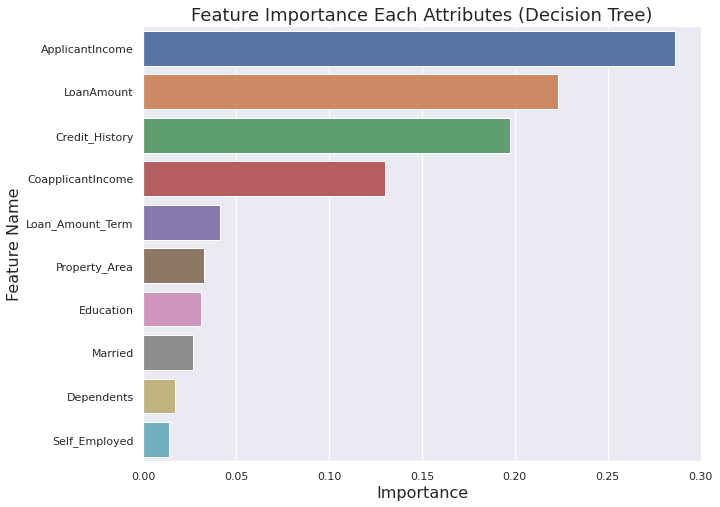

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest Feature Importances

In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi

,Feature Name,Importance
5,ApplicantIncome,0.221748
7,LoanAmount,0.210897
9,Credit_History,0.180060
6,CoapplicantIncome,0.123511
10,Property_Area,0.065982
2,Dependents,0.052863
8,Loan_Amount_Term,0.044922
1,Married,0.030063
3,Education,0.028105
0,Gender,0.022210


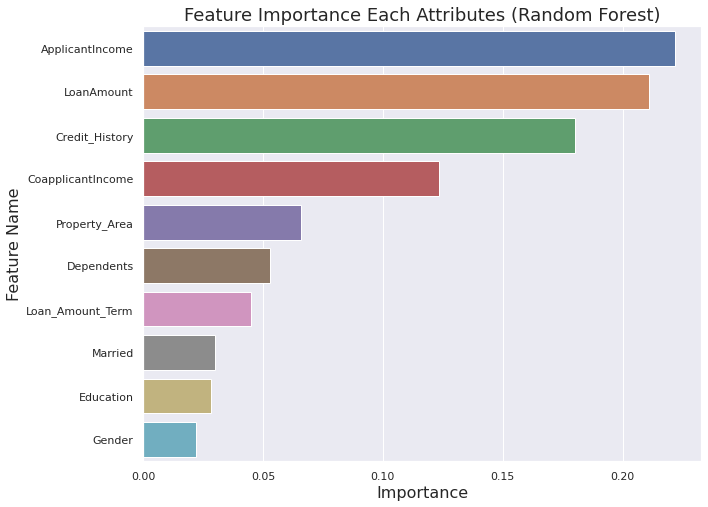

In [ ]:
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Test File

In [ ]:
check_missing = test.isnull().sum() * 100 / test.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Credit_History      7.901907
Self_Employed       6.267030
Gender              2.997275
Dependents          2.724796
Loan_Amount_Term    1.634877
LoanAmount          1.362398
dtype: float64

In [ ]:
test['Credit_History'].fillna(0, inplace=True)
test['Self_Employed'].fillna('No', inplace=True)
test['LoanAmount'].fillna(0, inplace=True)
test['Dependents'].fillna('0', inplace=True)
test['Loan_Amount_Term'].fillna(0, inplace=True)
test['Gender'].fillna('Male', inplace=True)

In [ ]:
test['Gender']= label_encoder.fit_transform(test['Gender'])
test['Gender'].unique()

array([1, 0])

In [ ]:
test['Married']= label_encoder.fit_transform(test['Married'])
test['Married'].unique()

array([1, 0])

In [ ]:
test['Dependents']= label_encoder.fit_transform(test['Dependents'])
test['Dependents'].unique()

array([0, 1, 2, 3])

In [ ]:
test['Education']= label_encoder.fit_transform(test['Education'])
test['Education'].unique()

array([0, 1])

In [ ]:
test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed'])
test['Self_Employed'].unique()

array([0, 1])

In [ ]:
test['Property_Area']= label_encoder.fit_transform(test['Property_Area'])
test['Property_Area'].unique()

array([2, 1, 0])

In [ ]:
test['Loan_Amount_Term']= label_encoder.fit_transform(test['Loan_Amount_Term'])
test['Loan_Amount_Term'].unique()

array([11,  8,  7,  0,  4, 12,  5,  2,  9, 10,  3,  6,  1])

In [ ]:
no = test[['Loan_ID']]
no.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051


In [ ]:
test_data = test.drop('Loan_ID', axis=1)

In [ ]:
y_pred_prob = xgb.predict(test_data)
y_pred_prob_df = pd.DataFrame(data=y_pred_prob)
y_pred_prob_df

,0
0,1
1,1
2,1
3,0
4,0
...,...
362,1
363,1
364,0
365,0


In [ ]:
no['Loan_Status'] = y_pred_prob_df
no.head(20)

<ipython-input-1221-d2c81104b3da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = y_pred_prob_df


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0
5,LP001054,1
6,LP001055,0
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [ ]:
no.dtypes

Loan_ID        object
Loan_Status     int64
dtype: object

In [ ]:
no["Loan_Status"]=no["Loan_Status"].astype(str)
no.dtypes

<ipython-input-1223-b6dbe6d13602>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no["Loan_Status"]=no["Loan_Status"].astype(str)


Loan_ID        object
Loan_Status    object
dtype: object

In [ ]:
no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('0', 'N')
no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('1', 'Y')
no['Loan_Status'].unique()

<ipython-input-1224-d5da83fc7852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('0', 'N')
<ipython-input-1224-d5da83fc7852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no['Loan_Status'] = no['Loan_Status'].astype(str).str.replace('1', 'Y')


array(['Y', 'N'], dtype=object)

In [ ]:
no

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,N
365,LP002986,N


In [ ]:
no = no.set_index(['Loan_ID'])

In [ ]:
no.to_csv('Loan_test.csv')